Анализ изображений и видео, 2

Лабораторная работа №7.

Гронский Дмитрий, CS

In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


# Проективные преобразования

In [3]:
startpoints = array([[-1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1, 0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ],
                     [-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. , 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. ,-1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. ]])

endpoints = array([[ 1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. , 1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. , -1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1, 0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ],
                   [-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. , 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1. , 1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. , 1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ]])

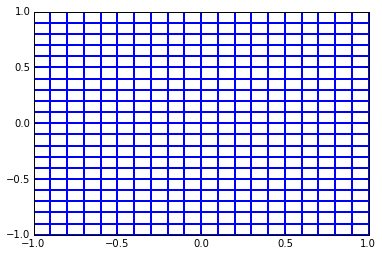

In [4]:
from mpl_toolkits.mplot3d import Axes3D
def plot_grid (startpoints, endpoints):
    if startpoints.shape[0]==2:
        for i in xrange(startpoints.shape[1]):
            plt.plot([startpoints[0, i], endpoints[0, i]], [startpoints[1, i], endpoints[1, i]], 'b-', linewidth=2)
    else:
        fig = plt.figure(figsize=(10, 10))
        ax = fig.gca(projection='3d')
        for i in xrange(startpoints.shape[1]):
            ax.plot([startpoints[0, i], endpoints[0, i]], [startpoints[1, i], endpoints[1, i]], 
                        [startpoints[2, i], endpoints[2, i]], 'b-', linewidth=2)
        
plot_grid(startpoints, endpoints)

In [5]:
H1 = np.array([[sqrt(3), -1, 1],
               [1, sqrt(3), 1],
               [0, 0, 2]])

H2 = np.array([[1, -1, 1],
               [1, 1, 0],
               [0, 0, 1]])

H3 = np.array([[1, 1, 0],
               [0, 2, 0],
               [0, 0, 1]])

H4 = np.array([[sqrt(3), -1, 1],
               [1, sqrt(3), 1],
               [0.25, 0.5, 2]])

In [6]:
startpoints_3d = np.vstack((startpoints, np.ones((1, startpoints.shape[1]))))
endpoints_3d = np.vstack((endpoints, np.ones((1, endpoints.shape[1]))))

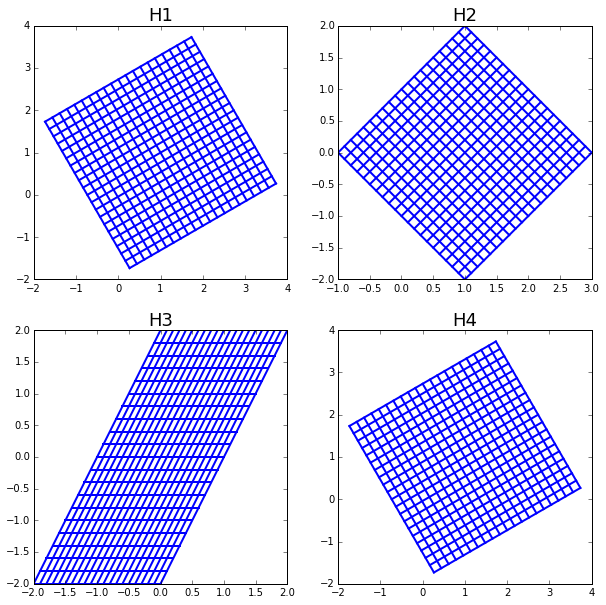

In [7]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plot_grid(H1.dot(startpoints_3d)[:2, :], H1.dot(endpoints_3d)[:2, :])
plt.title('H1', fontsize=18)
plt.subplot(2, 2, 2)
plot_grid(H2.dot(startpoints_3d)[:2, :], H2.dot(endpoints_3d)[:2, :])
plt.title('H2', fontsize=18)
plt.subplot(2, 2, 3)
plot_grid(H3.dot(startpoints_3d)[:2, :], H3.dot(endpoints_3d)[:2, :])
plt.title('H3', fontsize=18)
plt.subplot(2, 2, 4)
plot_grid(H4.dot(startpoints_3d)[:2, :], H4.dot(endpoints_3d)[:2, :])
plt.title('H4', fontsize=18)

# Из 3D в 2D

In [8]:
from scipy.io import loadmat

In [9]:
matrices = loadmat('3Dto2D.mat')
U = matrices['U']
P1 = matrices['P1']
P2 = matrices['P2']
print U.shape, P1.shape, P2.shape

(4L, 37583L) (3L, 4L) (3L, 4L)


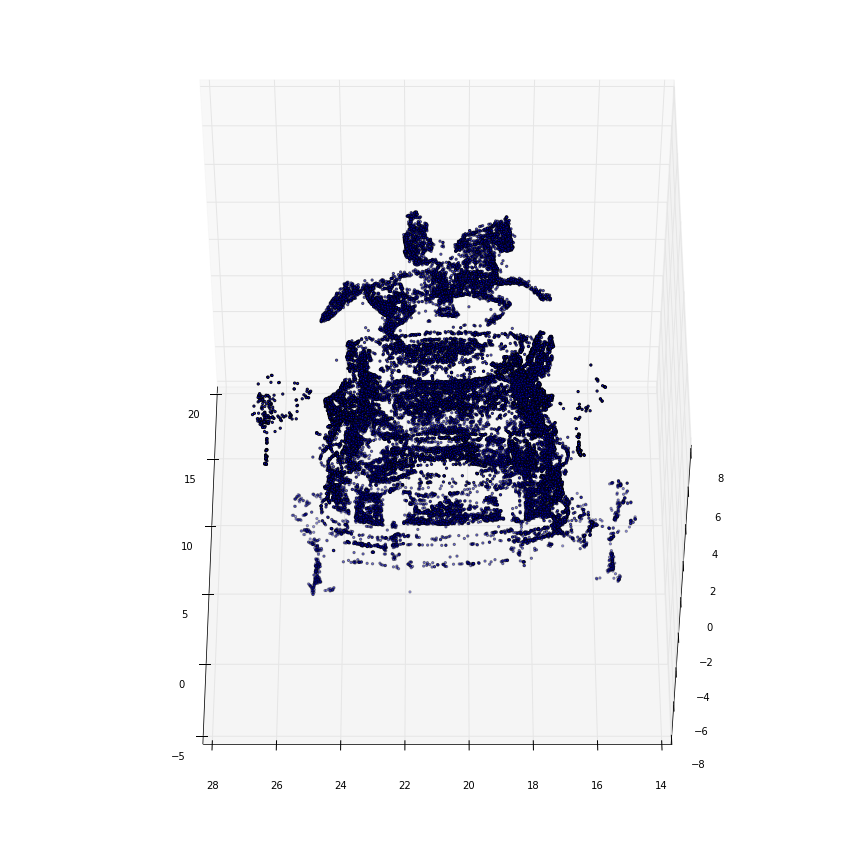

In [10]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111 , projection ='3d')
ax.scatter(U[0, :] / U[3, :], U[1, :] / U[3, :], U[2, :] / U[3, :], c='b', marker = '.')
ax.azim = 180
ax.elev = 50

In [11]:
def null (a , rtol=1e-5):
    u, s, v = np.linalg.svd(a)
    rank = (s > rtol * s[0] ).sum()
    return v[rank:].T.copy()

In [12]:
print P1
print P2

[[  2.35362471e+03   1.16524276e+02   1.02333589e+03   0.00000000e+00]
 [  1.15667754e+03   4.70914434e+02  -2.14150090e+03   0.00000000e+00]
 [  3.12922811e-01   9.46084667e-01   8.36846335e-02   0.00000000e+00]]
[[  2.39824255e+03  -2.78991933e+01   9.20867956e+02  -1.62197157e+03]
 [  3.60077547e+02   2.44217303e+03  -2.27649962e+02  -4.20761215e+04]
 [  3.18638435e-02   3.40165417e-01   9.39825614e-01   8.90082925e+00]]


In [13]:
c1 = null(P1)
c2 = null(P2)
print c1[:3] / c1[3]
print c2[:3] / c2[3]

[[ 0.]
 [ 0.]
 [ 0.]]
[[  6.6352039 ]
 [ 14.84597919]
 [-15.06911585]]


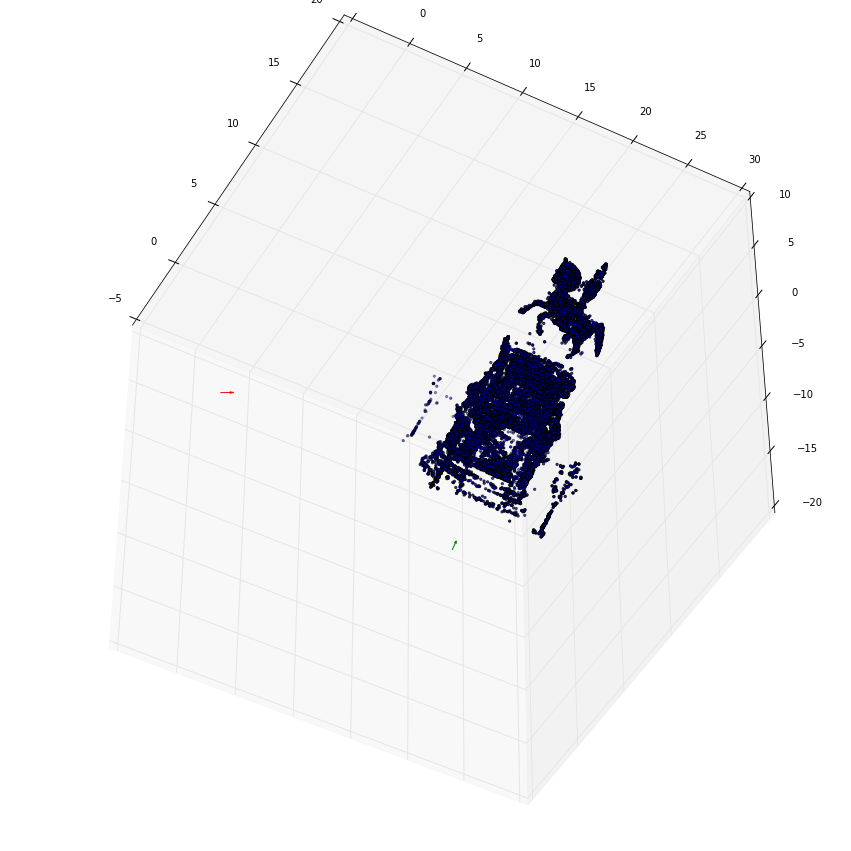

In [16]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111 , projection ='3d')
ax.scatter(U[0, :] / U[3, :], U[1, :] / U[3, :], U[2, :] / U[3, :], c='b', marker = '.')
ax.quiver(c1[0] / c1[3], c1[1] / c1[3], c1[2] / c1[3], P1[2, 0], P1[2, 1], P1[2, 2], color='r' )
ax.quiver(c2[0] / c2[3], c2[1] / c2[3], c2[2] / c2[3], P2[2, 0], P2[2, 1], P2[2, 2], color='g')
ax.azim = -29
ax.elev = -47


In [17]:
import cv2
dim1 = cv2.imread('3Dto2Dim1.jpg')[:, :, ::-1]
dim2 = cv2.imread('3Dto2Dim2.jpg')[:, :, ::-1]

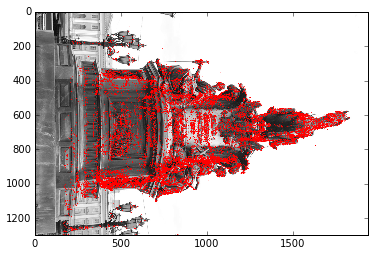

In [18]:
projection_1 = P1.dot(U)[:2, :] / P1.dot(U)[2, :]
projection_1 = projection_1.astype(int)
dim1 = np.array(dim1)
for i in xrange(projection_1.shape[1]):
    cv2.circle(dim1, center=(projection_1[0, i], projection_1[1, i]), radius=2, color=(255,0,0), thickness=-1)
plt.imshow(dim1)

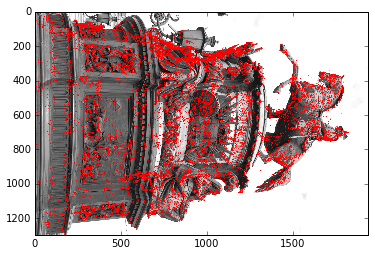

In [19]:
projection_2 = P2.dot(U)[:2, :] / P2.dot(U)[2, :]
projection_2 = projection_2.astype(int)
dim2 = np.array(dim2)
for i in xrange(projection_2.shape[1]):
    cv2.circle(dim2, center=(projection_2[0, i], projection_2[1, i]), radius=2, color=(255,0,0), thickness=-1)
plt.imshow(dim2)

# Калибровка камеры

In [20]:
from scipy.io import loadmat
from scipy.linalg import svd

In [21]:
import cv2

In [30]:
calibration = loadmat('calibration.mat')
print calibration.keys()

['x', 'model', '__version__', '__header__', '__globals__']


In [47]:
projection_1 = calibration['x'][0, 0]
projection_2 = calibration['x'][0, 1]
model = calibration['model']

In [48]:
A1 = np.empty((0, 12))
for i in xrange(model.shape[1]):
    s = np.array([0., 0., 0., 0., 
                  model[0, i], model[1, i], model[2, i], 1., 
                  -projection_1[1, i] * model[0, i], -projection_1[1, i] * model[1, i], -projection_1[1, i] * model[2, i], 
                  -projection_1[1, i]])
    A1 = np.vstack((A1, s))
    s = np.array([model[0, i], model[1, i], model[2, i], 1., 
                  0., 0., 0., 0.,
                  -projection_1[0, i] * model[0, i], -projection_1[0, i] * model[1, i], -projection_1[0, i] * model[2, i], 
                  -projection_1[0, i]])
    A1 = np.vstack((A1, s))

In [49]:
_, _, Vt = svd(A1)
p1 = Vt[-1, :]
P1 = p1.reshape((3, 4))
print P1

[[ -4.49343261e-02  -7.66417864e-03   3.37579910e-02  -6.49696463e-01]
 [  8.81249687e-03  -5.32344549e-02   8.98964591e-03  -7.56098081e-01]
 [ -1.60190855e-05  -1.05363893e-05  -1.00740392e-05  -6.17708287e-04]]


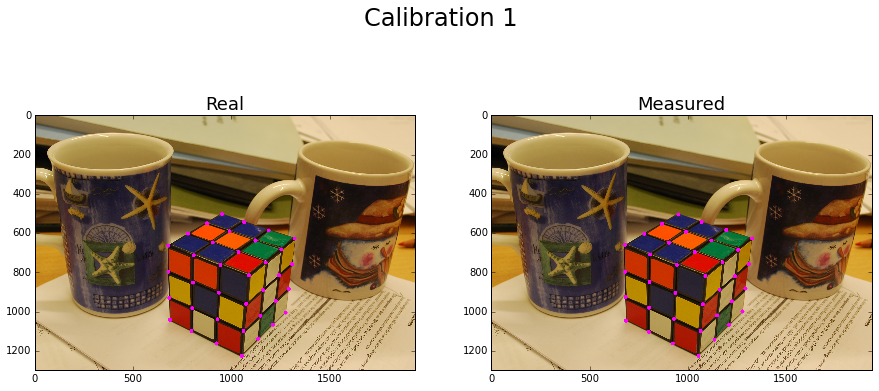

In [50]:
calib_1_real = np.array(cv2.imread('calib1.jpg')[:, :, ::-1])
for i in xrange(model.shape[1]):
    cv2.circle(calib_1_real, (int(projection_1[0, i]), int(projection_1[1, i])), 10, (255, 0, 255), -1)
plt.figure(figsize=(15, 7))
plt.subplot(121)
plt.imshow(calib_1_real)
plt.title('Real', fontsize=18)

calib_1_measured = np.array(cv2.imread('calib1.jpg')[:, :, ::-1])
projection_1_measured = P1.dot(np.vstack((model, np.ones(model.shape[1]))))
projection_1_measured = projection_1_measured[:2, :] / projection_1_measured[2, :]
projection_1_measured = projection_1_measured.astype(int)
for i in xrange(model.shape[1]):
    cv2.circle(calib_1_measured, (projection_1_measured[0, i], projection_1_measured[1, i]), 10, (255, 0, 255), -1)
plt.subplot(122)
plt.imshow(calib_1_measured)
plt.title('Measured', fontsize=18)
plt.suptitle('Calibration 1', fontsize=24)

In [51]:
A2 = np.empty((0, 12))
for i in xrange(model.shape[1]):
    s = np.array([0., 0., 0., 0., 
                  model[0, i], model[1, i], model[2, i], 1., 
                  -projection_2[1, i] * model[0, i], -projection_2[1, i] * model[1, i], -projection_2[1, i] * model[2, i], 
                  -projection_2[1, i]])
    A2 = np.vstack((A2, s))
    s = np.array([model[0, i], model[1, i], model[2, i], 1., 
                  0., 0., 0., 0.,
                  -projection_2[0, i] * model[0, i], -projection_2[0, i] * model[1, i], -projection_2[0, i] * model[2, i], 
                  -projection_2[0, i]])
    A2 = np.vstack((A2, s))
    
_, _, Vt = svd(A2)
p2 = Vt[-1, :]
P2 = p2.reshape((3, 4))
print P2

[[ -5.20109506e-02  -1.03763085e-02   2.72623114e-02  -6.16117496e-01]
 [  1.00275077e-02  -5.76843571e-02   9.97041310e-03  -7.83144499e-01]
 [ -1.40096405e-05  -1.23005899e-05  -1.42445663e-05  -6.62508389e-04]]


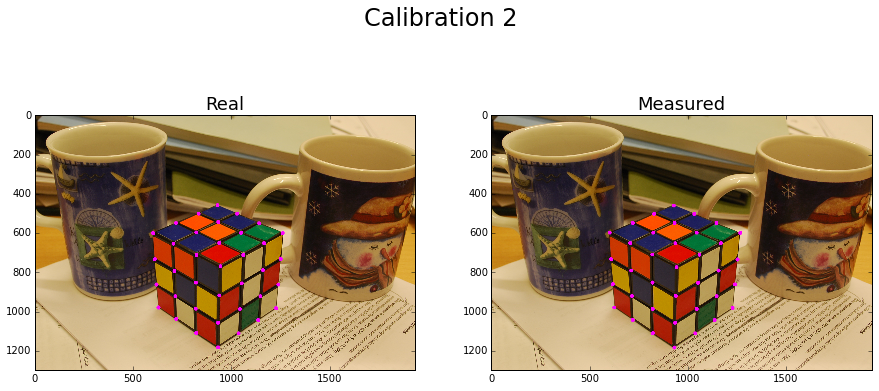

In [52]:
calib_2_real = np.array(cv2.imread('calib2.jpg')[:, :, ::-1])
for i in xrange(model.shape[1]):
    cv2.circle(calib_2_real, (int(projection_2[0, i]), int(projection_2[1, i])), 10, (255, 0, 255), -1)
plt.figure(figsize=(15, 7))
plt.subplot(121)
plt.imshow(calib_2_real)
plt.title('Real', fontsize=18)

calib_2_measured = np.array(cv2.imread('calib2.jpg')[:, :, ::-1])
projection_2_measured = P2.dot(np.vstack((model, np.ones(model.shape[1]))))
projection_2_measured = projection_2_measured[:2, :] / projection_2_measured[2, :]
projection_2_measured = projection_2_measured.astype(int)
for i in xrange(model.shape[1]):
    cv2.circle(calib_2_measured, (projection_2_measured[0, i], projection_2_measured[1, i]), 10, (255, 0, 255), -1)
plt.subplot(122)
plt.imshow(calib_2_measured)
plt.title('Measured', fontsize=18)
plt.suptitle('Calibration 2', fontsize=24)

## Факторизация

In [72]:
def rq(a):
    (m, n) = a.shape
    e = np.eye(m)
    p = e[:, range(m - 1, -1, -1)]
    (q0, r0) = np.linalg.qr(np.dot(np.dot(p, a[:, 0:m].transpose()), p))

    r = np.dot(np.dot(p, r0.transpose()), p)
    q = np.dot(np.dot(p, q0.transpose()), p)

    fix = np.diag(np.sign(np.diag(r)))

    r = np.dot(r, fix)
    q = np.dot(fix, q)

    if n > m:
        add_q = np.dot(np.linalg.inv(r), a[:, m:n])
        q = np.vstack((q, np.dot(np.linalg.inv(r), add_q.transpose()[0])))
    return(r, q)

$$
    P = K [I | 0] С^{-1} = K [R^T | -R^T T] = KR^T [I | -T] = [M | -MT]
$$
Разложение $M = KR^T$ получается с использованием функции rq. $T = -M^{-1} P[:, 3]$.

In [88]:
K1, Rt1 = rq(P1[:, :3])
T1 = -np.linalg.inv(P1[:, :3]).dot(P1[:, 3])
print 'K1 = ', K1
print ' '
print '[R | t] = ', np.hstack((Rt1.T, T1[:, np.newaxis]))

K1 =  [[  5.25871439e-02  -1.45087993e-04   2.12604445e-02]
 [  0.00000000e+00   5.25491080e-02   1.51977723e-02]
 [  0.00000000e+00   0.00000000e+00   2.16590135e-05]]
 
[R | t] =  [[ -0.55440657   0.38160162  -0.73960365 -19.21662216]
 [  0.04852427  -0.87235057  -0.48646672 -19.18946364]
 [  0.83083016   0.30558907  -0.46511995 -10.68964624]]


In [89]:
K2, Rt2 = rq(P2[:, :3])
T2 = -np.linalg.inv(P2[:, :3]).dot(P2[:, 3])
print 'K2 = ', K2
print ' '
print '[R | t] = ', np.hstack((Rt2.T, T2[:, np.newaxis]))

K2 =  [[  5.61977436e-02  -2.51043620e-04   1.99446981e-02]
 [  0.00000000e+00   5.65345684e-02   1.82013096e-02]
 [  0.00000000e+00   0.00000000e+00   2.34623573e-05]]
 
[R | t] =  [[ -7.11931722e-01   3.69609557e-01  -5.97111379e-01  -1.57865354e+01]
 [ -2.37900641e-03  -8.51549300e-01  -5.24269140e-01  -1.88608224e+01]
 [  7.02244661e-01   3.71823299e-01  -6.07124262e-01  -1.46965135e+01]]


## среднеквадратичная ошибка

In [90]:
print 'Image 1, error = ', np.sqrt(np.mean(np.linalg.norm(projection_1[:2, :] - projection_1_measured, axis=0) ** 2))
print 'Image 2, error = ', np.sqrt(np.mean(np.linalg.norm(projection_2[:2, :] - projection_2_measured, axis=0) ** 2))

Image 1, error =  3.60309530075
Image 2, error =  3.23333687281
